# 2. Transactions

# - All the code and in depth analysis is below the description!

# Transactions: Data Quality Issues and resolving methods used

- __Customer ID:__ This column includes the IDs of customers that performed a given transaction. There was a problem in this column, Customer ID's range upto 5034, which wasn't the case in the Customer Demographic dataset. So we filtered out transactions with customer ID above 4000. Data Quality Issue was **Inconsistency**.

- __Transaction Date:__ includes the date of the transaction, it includes a year data.

- __Online Order:__ tells us whether a product was purchased online or not. There were 360 missing values in values in this column. We removed those records. Data Quality Issue was **Incompleteness**.
- __Order Status:__ tells us whether a given transaction was successfull. No issues in this column.

- __Brand:__ tells us what brand of the product the customer purchased by the customer. There were 195 missing values in this column. We dropped records with missing values in this column. Data Quality Issue was **Incompleteness**.

- __Product Line:__ refers to group of products that a company sells under a single brand. No issue in this column.
- __Product Class:__ refers to group of products that are homogeous or generally considered as substitutes for eachother. No issues in this column.
- __Product Size:__ refers to the size of the products purchased in that transaction. No issues in this column. 

- __List Price:__ refers to the price of a product set by a retailer or the shop keeper. No issues in this column.
- __Standard Cost:__ refers to the amount of that has been used to produce a given product. No issue in this column.
- __Profit:__ This column didn't exist in the original dataset , we calculated it using List Price and Standard Cost.
- __Product First Sold Date:__ refers to the time at which a product is transferred by Company to a third party for consideration.

In [1]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The path where the file is
file = r"Dataset/KPMG_VI_New_raw_data_update_final.xlsx"

trans = pd.read_excel(file, sheet_name="Transactions") # Transactions Dataset

In [3]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [4]:
trans.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1999-06-23


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


### I. Transaction ID and Product ID

In [7]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [8]:
# Checking if there are any duplicates in the transaction ID column, since each transaction can have a unique ID.
# Luckily for us there is no problem for that.
trans["transaction_id"].duplicated().sum()

0

In [9]:
# There are 0 empty values in this column.
print("The Transaction ID column has " + str(trans["transaction_id"].isna().sum()) + " empty values")

The Transaction ID column has 0 empty values


In [10]:
# There are 0 empty values in this column.
print("The Product ID column has " + str(trans["product_id"].isna().sum()) + " empty values")

The Product ID column has 0 empty values


In [11]:
trans["product_id"].duplicated().sum()

19899

- **`You might be tempted to say there is a problem in this column because of duplicated values, But it's not the case that every transaction will have different products sold but rather same products sold to various customers so duplicated values in this column is not a problem.`**

### II. Customer ID

In [12]:
# There are 0 empty values in this column.
print("The Customer ID column has " + str(trans["customer_id"].isna().sum()) + " empty values")

The Customer ID column has 0 empty values


In [13]:
trans["customer_id"].duplicated().sum()

16506

- **`Having duplicate values in the Customer ID column is not a problem here as well, because it's not neccessarily the case that every transaction will be by different customers so it is not a problem.`**

- __From what we have seen earlier in the Customer Demographic dataset we know that the customer id is in the range from 1 to 4000, let's see if that holds for this Transaction dataset.__

In [14]:
trans["customer_id"].max()

5034

- __It looks like there are transactions where the registered customer ID are above 4000, We have to take care of this problem, we can remove transactions with customer ID above 4000.__

In [15]:
trans.loc[trans["customer_id"] > 4000]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
8707,8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-02
16700,16701,0,5034,2017-01-27,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-25
17468,17469,0,5034,2017-01-03,0.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,1992-10-02


In [16]:
trans.drop([8707, 16700, 17468], inplace=True)

In [17]:
# Checking..
trans["customer_id"].max()

3500

- **Looks good now since the customer id is less than 4000.**

### III. Transaction Date

In [18]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [19]:
trans["transaction_date"]

0       2017-02-25
1       2017-05-21
2       2017-10-16
3       2017-08-31
4       2017-10-01
           ...    
19995   2017-06-24
19996   2017-11-09
19997   2017-04-14
19998   2017-07-03
19999   2017-09-22
Name: transaction_date, Length: 19997, dtype: datetime64[ns]

In [20]:
print("The transaction dataset includes data from " + str(trans.transaction_date.min())
      + " to " + str(trans.transaction_date.max()))

The transaction dataset includes data from 2017-01-01 00:00:00 to 2017-12-30 00:00:00


- __As we can see the dataset contains a year transaction data from `January 1, 2017` to `December 30, 2017`.__

### IV. Online Order

In [21]:
trans["online_order"]

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
19995    1.0
19996    1.0
19997    1.0
19998    0.0
19999    1.0
Name: online_order, Length: 19997, dtype: float64

- __`Online Order tells us whether a product bought in that transaction was Online or not, 1 if it is bought online 0 otherwise.`__

In [22]:
# There are 360 empty values in the online order column.
print("The Online Order column has " + str(trans["online_order"].isna().sum()) + " empty values")

The Online Order column has 360 empty values


- __As we can see there are 360 records that are blank in the Online Order column. We will remove those records.__

In [23]:
trans.dropna(subset=["online_order"], inplace=True)

In [24]:
# Checking...
trans["online_order"].isna().sum()

0

In [25]:
trans["online_order"].value_counts(normalize=True)

1.0    0.500535
0.0    0.499465
Name: online_order, dtype: float64

- `As we can see there are as much transactions ordered Online as those that weren't ordered online.`

### V. Order Status

In [26]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [27]:
trans["order_status"].unique()

array(['Approved', 'Cancelled'], dtype=object)

- __`Order Status column tells us whether the transaction was conducted successfully. If approved then the transaction was successfull, else if the transaction was Cancelled then that transaction was not of success.`__

In [28]:
# There are 0 empty values in this column
print("The Order Status column has " + str(trans["order_status"].isna().sum()) + " empty values")

The Order Status column has 0 empty values


In [29]:
trans["order_status"].value_counts(normalize=True)

Approved     0.99119
Cancelled    0.00881
Name: order_status, dtype: float64

- __Most of the transactions were successfull, i.e 99% of the transactions were `Approved` while only 0.8% were `Canceled`.__

- __Let's Visualize it.__

In [30]:
plt.rcParams["figure.figsize"] = 16, 6

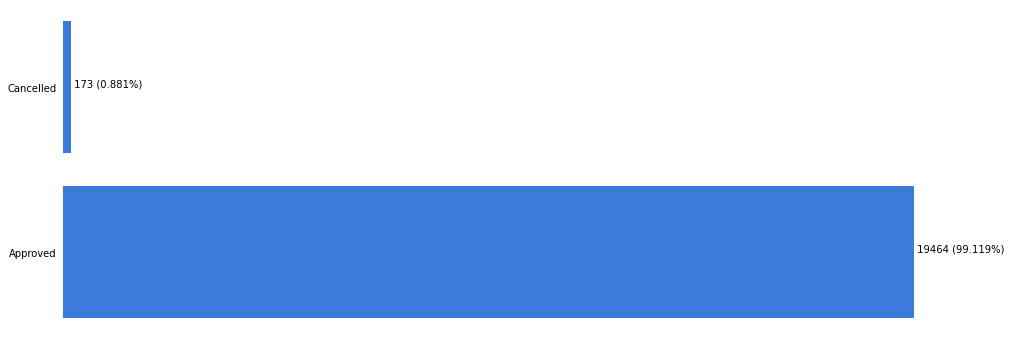

In [31]:
fig, ax = plt.subplots()

ax.barh(trans["order_status"].value_counts().index,
        trans["order_status"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(trans["order_status"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(trans)/100), 4)}%)")


plt.show()

### VI. Brand

In [32]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [33]:
trans["brand"].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

- __`Brand column tells us about the brand of the product purchased by the customer.`__

In [34]:
# There are 195 empty values in the brand column.
print("The Brand column has " + str(trans["brand"].isna().sum()) + " empty values")

The Brand column has 195 empty values


- __We will remove the missing values in the brand column.__

In [35]:
trans.dropna(subset=["brand"], inplace=True)

In [36]:
# Checking..
trans["brand"].isna().sum()

0

In [37]:
trans["brand"].value_counts(normalize=True)

Solex             0.214381
WeareA2B          0.166907
Giant Bicycles    0.166855
OHM Cycles        0.153894
Trek Bicycles     0.150756
Norco Bicycles    0.147207
Name: brand, dtype: float64

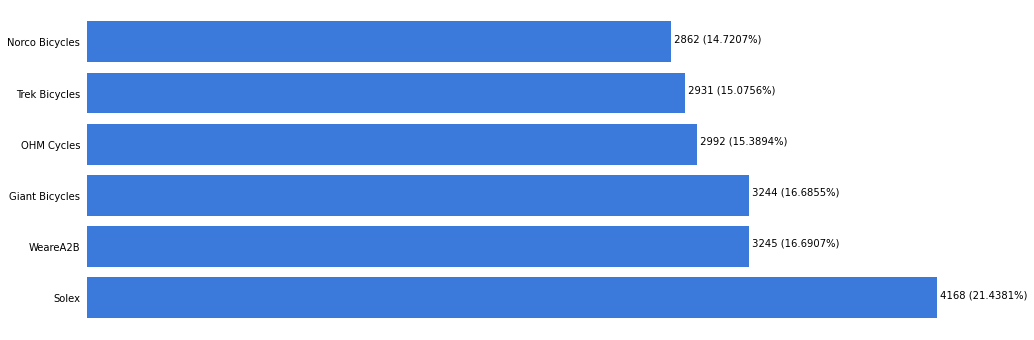

In [38]:
fig, ax = plt.subplots()

ax.barh(trans["brand"].value_counts().index,
        trans["brand"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(trans["brand"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(trans)/100), 4)}%)")


plt.show()

- __As we can see the `brands` of most of the products in the transaction are `Solex` (with 21.4%), the remaining brands are were more or less in the same range (14% - 16%).__

### VII. Product Line

In [39]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [40]:
trans["product_line"].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

- __Let's first start with the meaning of `Product Line`, It refers to group of products that a company sells under a single brand. The products are similar and focous on the same market sector. In our case for example Road product line refers to a group of bicycles that are built for traveling at speed on paved roads.__

In [41]:
# There are 0 empty values in this column.
print("The Product Line column has " + str(trans["product_line"].isna().sum()) + " empty values")

The Product Line column has 0 empty values


In [42]:
trans["product_line"].value_counts(normalize=True)

Standard    0.715924
Road        0.200185
Touring     0.062391
Mountain    0.021500
Name: product_line, dtype: float64

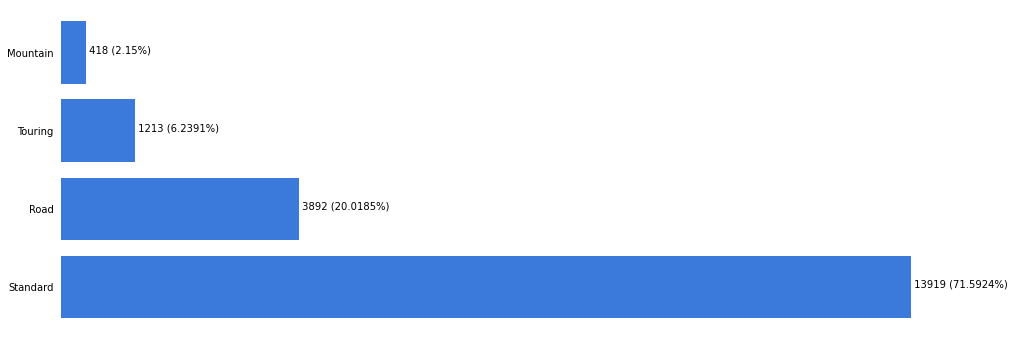

In [43]:
fig, ax = plt.subplots()

ax.barh(trans["product_line"].value_counts().index,
        trans["product_line"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(trans["product_line"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(trans)/100), 4)}%)")


plt.show()

- __Most of the products are lined as Standard (with 71%) followed by Road product line (with 20%) then Touring and Mountain which together make 8.3%.__

### VIII. Product Class

In [44]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [45]:
trans["product_class"].unique()

array(['medium', 'low', 'high'], dtype=object)

- __`A product class` is a group of products that are homogeneous or generally considered as substitutes for each other. here we have 3 product classess low, medium and high.`__

In [46]:
# There are 0 empty values in this column.
print("The Product Class column has " + str(trans["product_class"].isna().sum()) + " empty values")

The Product Class column has 0 empty values


In [47]:
trans["product_class"].value_counts(normalize=True)

medium    0.698694
high      0.151836
low       0.149470
Name: product_class, dtype: float64

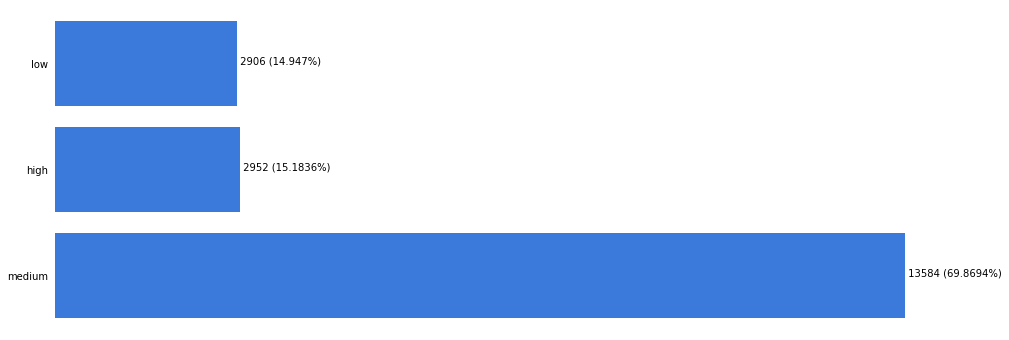

In [48]:
fig, ax = plt.subplots()

ax.barh(trans["product_class"].value_counts().index,
        trans["product_class"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(trans["product_class"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(trans)/100), 4)}%)")


plt.show()

- __Most of the products in the transaction had `Medium` product class (with 70%) followed by `High` product class and `Low` product class which make up 15% each.__

### IX: Product Size

In [49]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [50]:
trans["product_size"].unique()

array(['medium', 'large', 'small'], dtype=object)

- __`Product size` refers to the size of the products purchased in that transaction. We have 3 product sizes small, medium and large.__

In [51]:
trans["product_size"].value_counts(normalize=True)

medium    0.656517
large     0.200597
small     0.142887
Name: product_size, dtype: float64

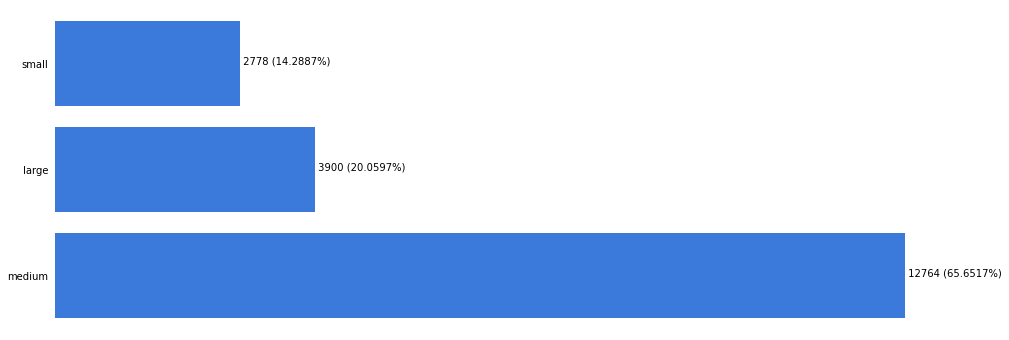

In [52]:
fig, ax = plt.subplots()

ax.barh(trans["product_size"].value_counts().index,
        trans["product_size"].value_counts().values, color="#3b79db")

ax.set_frame_on(False)

ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)

for index, value in enumerate(trans["product_size"].value_counts().values):
    ax.text(value, index, s=f" {value} ({np.round(value/(len(trans)/100), 4)}%)")


plt.show()

- __`Medium` sized products (Bikes) make up 65% of the total products followed by `Large` sized products (Bikes) with 20% and finally `Small `sized products (Bikes) with 15%.__

### X: List Price

In [53]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [54]:
trans["list_price"]

0          71.49
1        2091.47
2        1793.43
3        1198.46
4        1765.30
          ...   
19995    2005.66
19996     416.98
19997    1636.90
19998     227.88
19999    1775.81
Name: list_price, Length: 19442, dtype: float64

- __The `List Price` refers to price of a product set by the retailer or the shopkeeper, in reaction to the changes in the local markets.__

In [55]:
trans["list_price"].max()

2091.47

In [56]:
trans["list_price"].min()

12.01

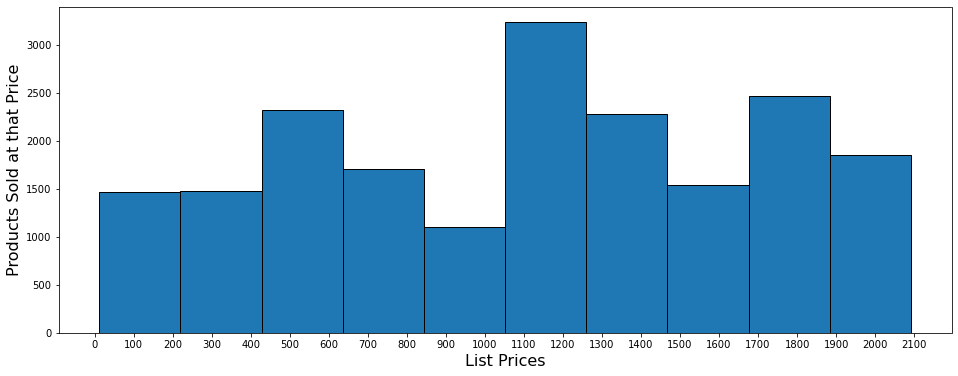

In [57]:
trans["list_price"].hist(grid=False, edgecolor="black", bins=10)

plt.xticks([i for i in range(0, 2200, 100)])

plt.xlabel("List Prices", size=16)
plt.ylabel("Products Sold at that Price", size=16)

plt.show()

- As we can see most of the products (Bikes) had a List Price in the range 1050-1300 and smallest portion of the bikes were sold at a price in the range 850-1000.

### XI: Standard Cost

In [58]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [59]:
trans["standard_cost"]

0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
19995    1203.40
19996     312.74
19997      44.71
19998     136.73
19999    1580.47
Name: standard_cost, Length: 19442, dtype: float64

- __`Standard cost` is the amount of money that has been used to produce a product.__

In [60]:
trans["standard_cost"].max()

1759.85

In [61]:
trans["standard_cost"].min()

7.21

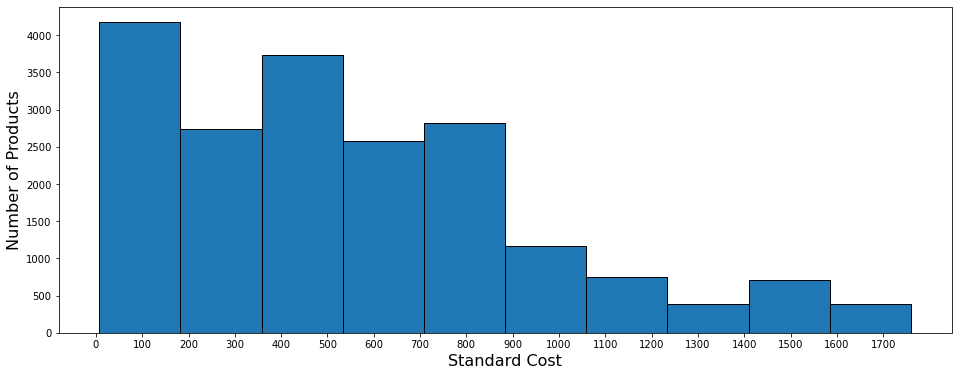

In [62]:
trans["standard_cost"].hist(grid=False, edgecolor="black", bins=10)

plt.xticks([i for i in range(0, 1800, 100)])

plt.xlabel("Standard Cost", size=16)
plt.ylabel("Number of Products", size=16)

plt.show()

- As we can see the Standard Cost for is lower for most of the products and as the standard cost of that product increases the lesser people that buy those products.

### XII: Profit

In [63]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


- ___We can add another column 'Profit' by using the List Price and the Standard Cost, adding the Profit column will be helpful in further analysis.___

In [64]:
trans.insert(loc=12, column="profit", value=trans["list_price"] - trans["standard_cost"])

In [65]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10


In [66]:
trans["profit"]

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: profit, Length: 19442, dtype: float64

- __The `Profit` column has been calculated using the List Price and Standard Cost, it tells the financial benefit we get from that transaction.__

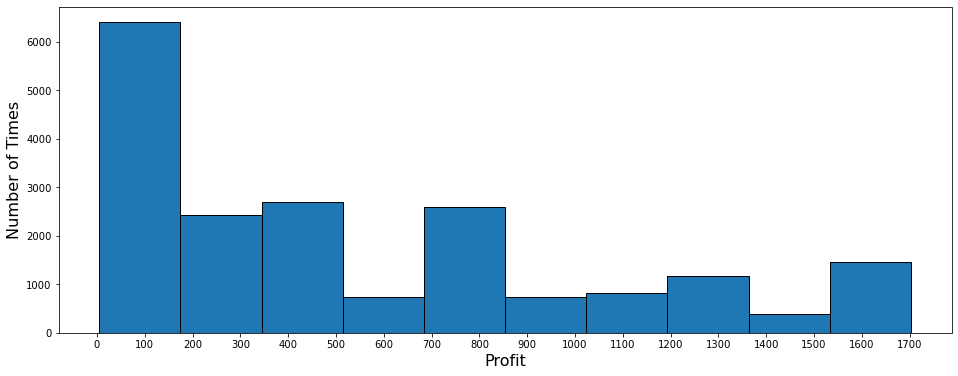

In [67]:
trans["profit"].hist(grid=False, edgecolor="black", bins=10)

plt.xticks([i for i in range(0, 1800, 100)])

plt.xlabel("Profit", size=16)
plt.ylabel("Number of Times", size=16)

plt.show()

- We have gotten a profit in the range 5-200 many times than anny other, and as the profit we make increases the lesser number of times we will be making those Profits.

In [68]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10


In [69]:
trans["product_first_sold_date"]

0       2012-12-02
1       2014-03-03
2       1999-07-20
3       1998-12-16
4       2015-08-10
           ...    
19995   2003-07-21
19996   1997-05-10
19997   2010-08-20
19998   2004-08-17
19999   1999-06-23
Name: product_first_sold_date, Length: 19442, dtype: datetime64[ns]

- Product First Sold Date means the time at which a product is transferred by Company to a third party for consideration.

# Transactions: Data Quality Issues and resolving methods used

- __Customer ID:__ This column includes the IDs of customers that performed a given transaction. There was a problem in this column, Customer ID's range upto 5034, which wasn't the case in the Customer Demographic dataset. So we filtered out transactions with customer ID above 4000. Data Quality Issue was **Inconsistency**.

- __Transaction Date:__ includes the date of the transaction, it includes a year data.

- __Online Order:__ tells us whether a product was purchased online or not. There were 360 missing values in values in this column. We removed those records. Data Quality Issue was **Incompleteness**.
- __Order Status:__ tells us whether a given transaction was successfull. No issues in this column.

- __Brand:__ tells us what brand of the product the customer purchased by the customer. There were 195 missing values in this column. We dropped records with missing values in this column. Data Quality Issue was **Incompleteness**.

- __Product Line:__ refers to group of products that a company sells under a single brand. No issue in this column.
- __Product Class:__ refers to group of products that are homogeous or generally considered as substitutes for eachother. No issues in this column.
- __Product Size:__ refers to the size of the products purchased in that transaction. No issues in this column. 

- __List Price:__ refers to the price of a product set by a retailer or the shop keeper. No issues in this column.
- __Standard Cost:__ refers to the amount of that has been used to produce a given product. No issue in this column.
- __Profit:__ This column didn't exist in the original dataset , we calculated it using List Price and Standard Cost.
- __Product First Sold Date:__ refers to the time at which a product is transferred by Company to a third party for consideration.

In [70]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,802.26,2003-07-21
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,104.24,1997-05-10
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1592.19,2010-08-20
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,91.15,2004-08-17


In [71]:
trans.to_csv(r"Exported/transactions.csv", index=False)